# <font color='orange'>Trabajo práctico N° 2</font>
## <font color='cornflowerblue'>Visión por computadora I</font>
### <font color='violet'>Alumno: Zenklusen, Kevin</font>

Implementar la función create_gauss_filter(h, w, k_size, sigma) para crear filtros gaussianos para 
filtrado espectral. Debe retornar un filtro gaussiano de tamaño HxW en dominio espacial y su transformada 
de Fourier.
1. Graficar ambas representaciones para diferentes tamaños de kernel y sigma. Aplicar el filtro una 
imagen para validar el funcionamiento en el dominio espectral. 
2. Usando el método descripto en el paper “Image Sharpness Measure for Blurred Images in Frequency 
Domain” comparar el resultado de un filtrado por convolución con el filtrado espectral.
3. Repetir la comparación usando uno de los métodos descriptos en el apéndice del paper “Analysis of 
focus measure operators in shape-from-focus"

1.

In [6]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

In [9]:
# Funciones auxiliares
def fft2_mod(image):

  shifted_image_fft = np.fft.fftshift(np.fft.fft2(image))

  return 20*np.log(np.abs(shifted_image_fft))


def _filter_round_shape(height, width, radius):
  canvas = np.zeros((height, width))
  return cv.circle(canvas,
                     center=(int(canvas.shape[1]/2), int(canvas.shape[0]/2)),
                     radius=radius,
                     color=(255),
                     thickness=-1).astype(np.uint8)


def create_lp_filter(height, width, radius=20):

  lp_filter = _filter_round_shape(height, width, radius)
  return lp_filter


def create_hp_filter(height, width, radius=60):

  lp_filter = _filter_round_shape(height, width, radius)
  return cv.bitwise_not(lp_filter)

In [10]:
def create_gauss_filter(h, w, k_size, sigma):
    # Creamos el kernel gaussiano 1D
    kernel_1d = cv.getGaussianKernel(ksize=k_size, sigma=sigma)
    
    # Creamos el kernel gaussiano 2D
    kernel_2d = kernel_1d * kernel_1d.T
    
    # Inicializamos el filtro gaussiano de tamaño HxW con ceros
    gauss_filter = np.zeros((h, w), dtype=np.float64)
    
    # Obtenemos las coordenadas centrales para insertar el kernel
    center_h = h // 2
    center_w = w // 2
    
    # Insertamos el kernel 2D en el centro del filtro gaussiano HxW
    k_half = k_size // 2
    gauss_filter[center_h - k_half:center_h + k_half + 1, center_w - k_half:center_w + k_half + 1] = kernel_2d
    
    # Calculamos la transformada de Fourier del filtro gaussiano
    gauss_filter_fft = np.fft.fft2(gauss_filter)
    
    return gauss_filter, gauss_filter_fft

In [11]:
def generate_gaussian_kernel_plots(h, w, k_sizes, sigmas):
    for k_size in k_sizes:
        for sigma in sigmas:
            # Creamos el kernel gaussiano y su transformación de Fourier
            kernel, kernel_tf = create_gauss_filter(h, w, k_size=k_size, sigma=sigma)
            
            # Configuramos la figura para los gráficos
            plt.figure(figsize=(12, 6))
            
            # Gráfico del kernel gaussiano
            plt.subplot(1, 2, 1)
            plt.axis('off')
            plt.title(f"Kernel Gausiano\nk_size={k_size}, sigma={sigma}")
            plt.imshow(kernel, cmap='jet')
            
            # Gráfico de la FFT del kernel
            plt.subplot(1, 2, 2)
            plt.axis('off')
            plt.title(f"FFT del kernel\nk_size={k_size}, sigma={sigma}")
            tf_shifted = np.fft.fftshift(kernel_tf)
            plt.imshow(np.abs(tf_shifted), cmap='jet')
            
            # Mostramos los gráficos
            plt.show()


In [13]:
# Leo la imagen en escala de grises
img = cv.imread('CoordCrom_1.png', cv.IMREAD_GRAYSCALE)
# Obtengo el modulo de la transformada de fourier
mod = fft2_mod(img)
h, w = img.shape

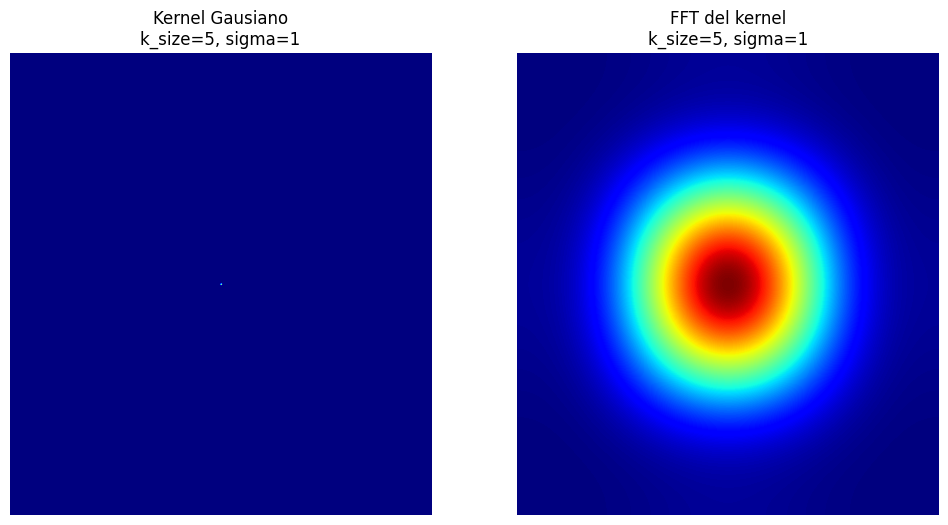

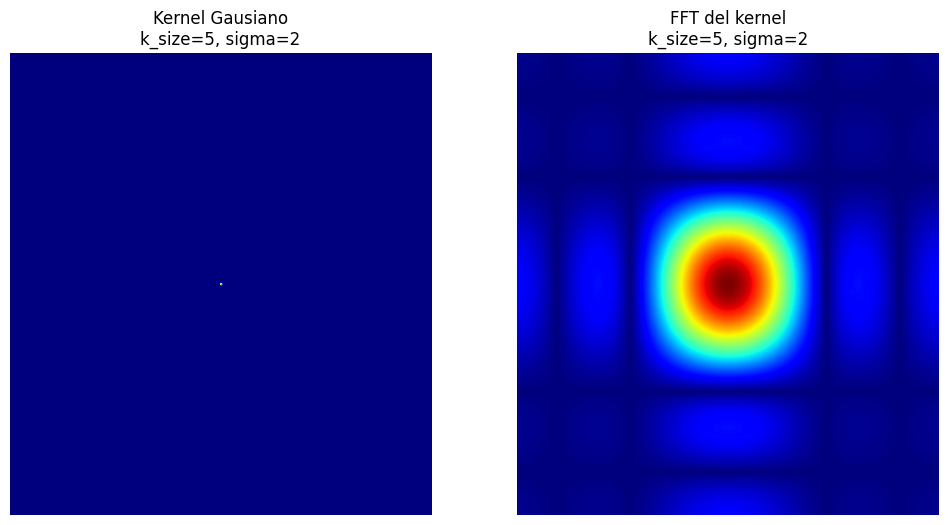

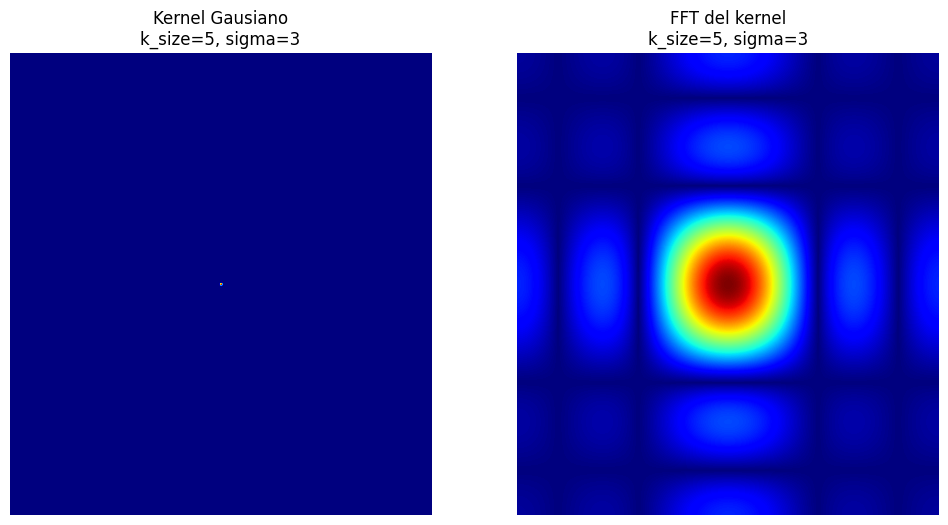

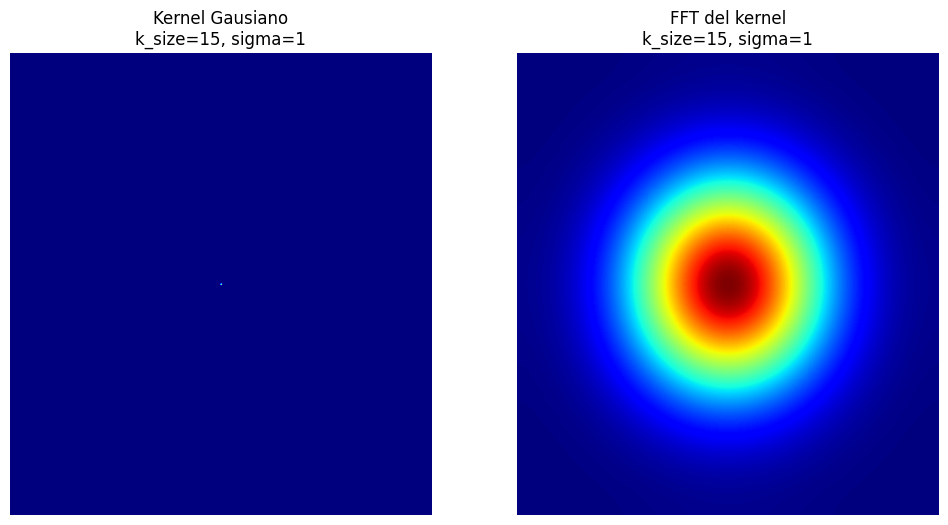

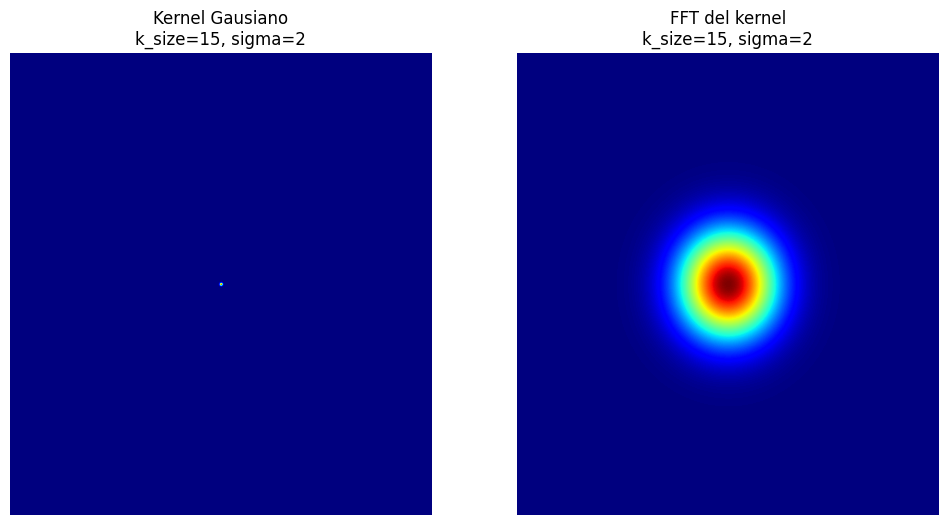

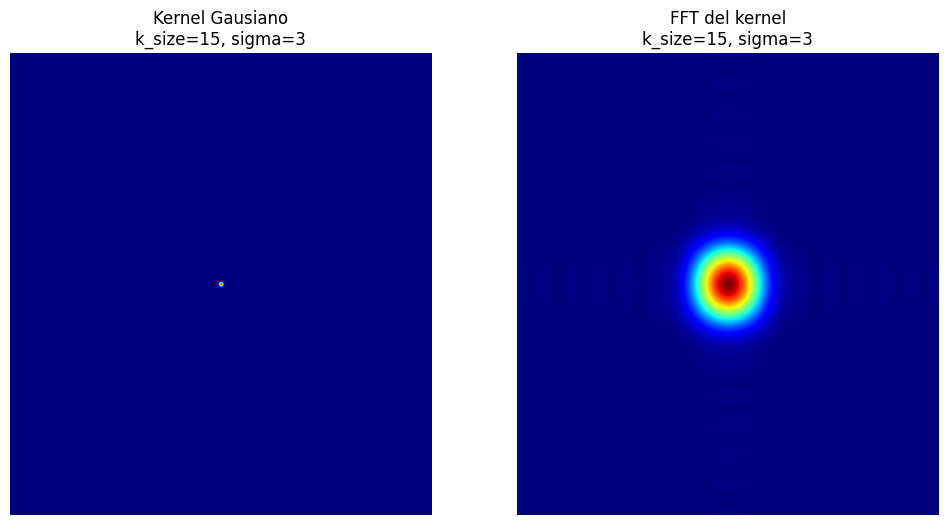

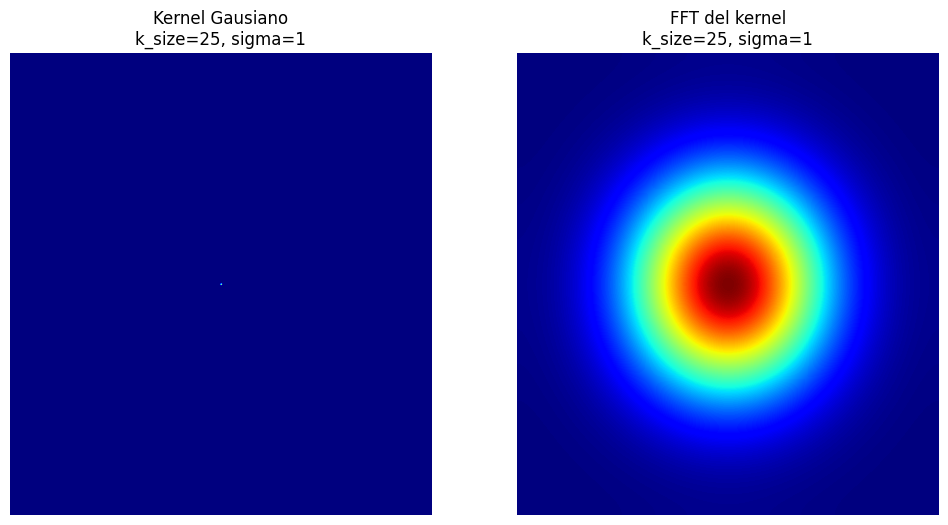

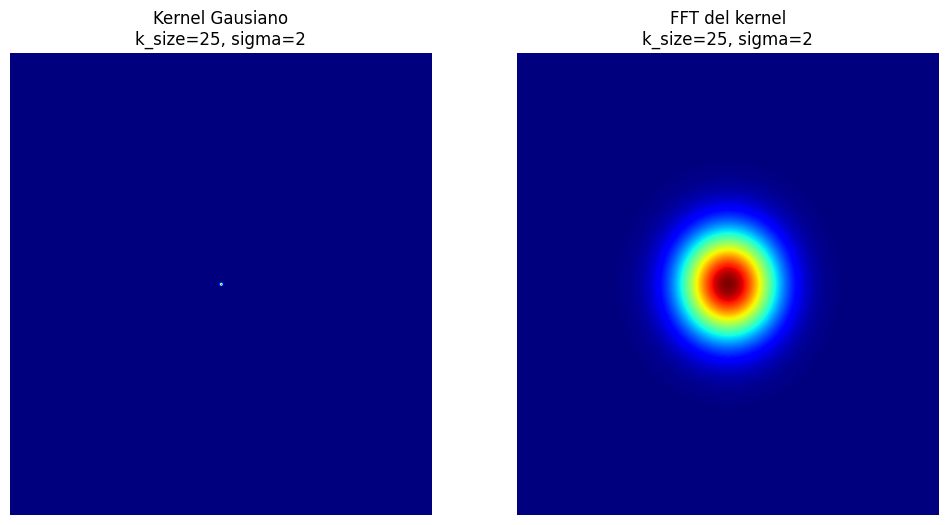

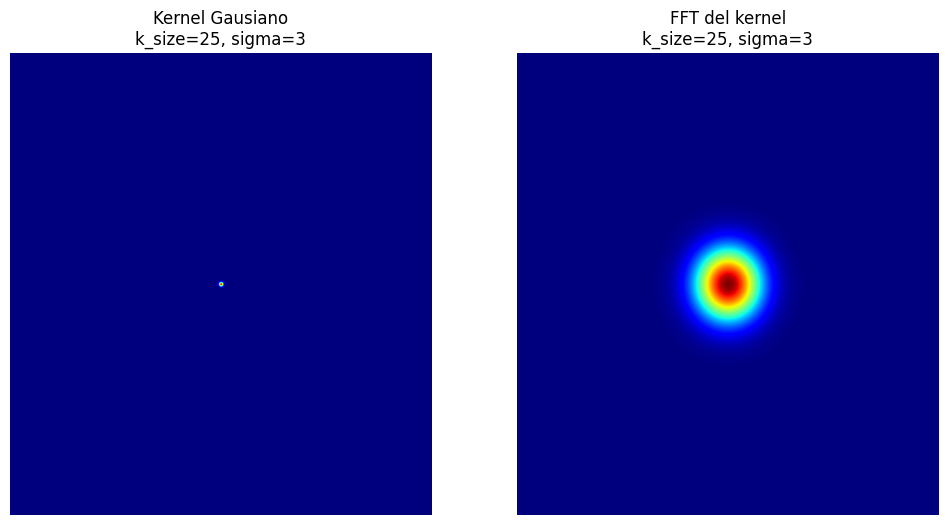

In [14]:
k_sizes = [5, 15, 25]  # Lista de tamaños de kernel
sigmas = [1, 2, 3]  # Lista de valores sigma

generate_gaussian_kernel_plots(h, w, k_sizes, sigmas)

Text(0.5, 1.0, 'Desenfoque gausiano')

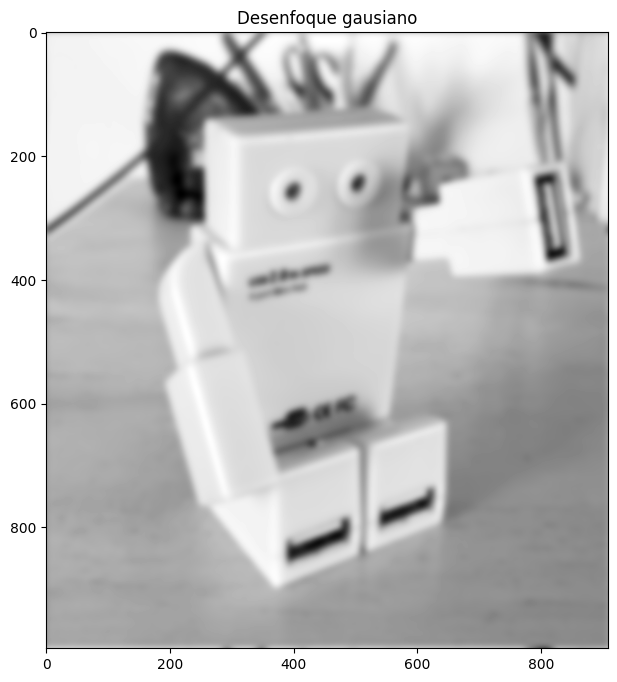

In [17]:
kernel, kernel_tf = create_gauss_filter(h, w, k_size=25, sigma=5)
img_fft = np.fft.fft2(img)
filtered = img_fft * kernel_tf

img_gauss = np.fft.ifftshift(np.real(np.fft.ifft2(filtered)))

plt.figure(figsize=(8,8))
plt.imshow(img_gauss, cmap='gray')
plt.title('Desenfoque gausiano')

2.

Text(0.5, 1.0, 'Desenfoque gausiano por convolución')

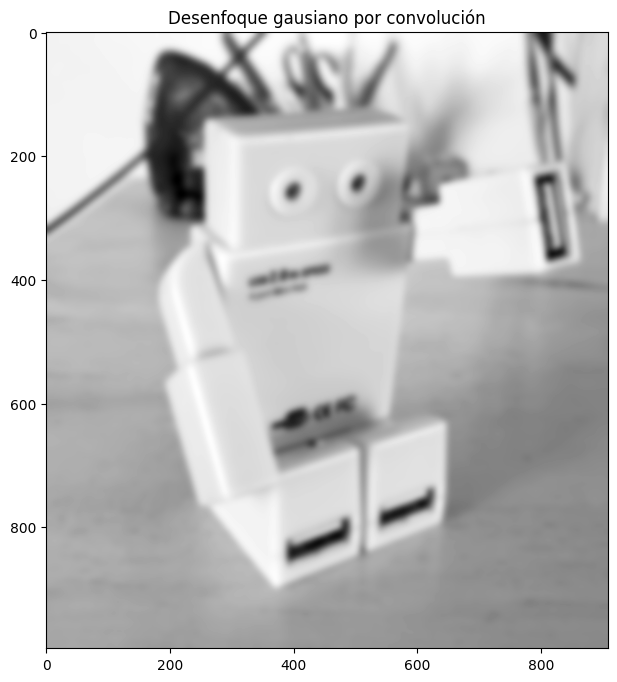

In [25]:
# Aplicamos filtro de convolución
img_convolution_gauss = cv.filter2D(img, -1, kernel)

# Mostramos la imagen resultante
plt.figure(figsize=(8,8))
plt.imshow(img_convolution_gauss, cmap='gray')
plt.title('Desenfoque gausiano por convolución')

In [28]:
def compute_sharpness(image):
    
    # Paso 1
    f = np.fft.fft2(image)

    # Paso 2
    fshift = np.fft.fftshift(f)
    
    # Paso 3: Calculamos el valor absoluto de los coeficientes de Fourier
    abs_values = np.abs(fshift)

    # Paso 4: Calculamos el valor máximo de los coeficientes
    maximum_value = np.max(abs_values)

    # Paso 5: Calculamos el número total de coeficientes que son mayores que
    # maximum_value / 1000
    total = abs_values[abs_values > maximum_value / 1000].size

    # Paso 6 + Return
    return (total / image.size)

spectral_filtered_image = img_gauss

# Calculamos la nitidez
sharpness_convolution = compute_sharpness(img_convolution_gauss)
sharpness_spectral = compute_sharpness(spectral_filtered_image)
sharpness_original = compute_sharpness(img)

print("Nitidez del filtrado por convolución:", sharpness_convolution)
print("Nitidez del filtrado espectral:", sharpness_spectral)
print("Nitidez imagen original:", sharpness_original)

Nitidez del filtrado por convolución: 0.0022214408293968826
Nitidez del filtrado espectral: 0.0021108663729809104
Nitidez imagen original: 0.003448817295614175


El menor puntaje de nitidez fue obtenido por el filtrado espectral, lo que implica que es el método que más blurring genera

3. Se utiliza en método A.20. Variance of Laplacian (LAP4)

In [30]:
def LAPV(img):
    """Implements the Variance of Laplacian (LAP4) focus measure
    operator. Measures the amount of edges present in the image.

    :param img: the image the measure is applied to
    :type img: numpy.ndarray
    :returns: numpy.float32 -- the degree of focus
    """
    return np.std(cv.Laplacian(img, cv.CV_64F)) ** 2

# Calculamos la nitidez
focus_convolution = LAPV(img_convolution_gauss)
focus_spectral = LAPV(spectral_filtered_image)
focus_original = LAPV(img)

print("Nitidez del filtrado por convolución:", focus_convolution)
print("Nitidez del filtrado espectral:", focus_spectral)
print("Nitidez imagen original:", focus_original)

Nitidez del filtrado por convolución: 1.2253186751420064
Nitidez del filtrado espectral: 0.4903890152828109
Nitidez imagen original: 153.28858825376776


Nuevamente, el menor puntaje de nitidez fue obtenido por el filtrado espectral, lo que implica que es el método que más blurring genera